<a href="https://colab.research.google.com/github/Ashfakur-Rahman/Adv-Python-Programming-DataScience-SUST/blob/main/LogisticRegression_TT_03_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression (Problem Definition)
ধরা যাক, একটি কোম্পানি তাদের গ্রাহকদের আচরণ বিশ্লেষণ করতে চায়। তারা লক্ষ্য করেছে যে গ্রাহকের বয়স (Age) এবং মাসিক বেতন (Salary) এর উপর নির্ভর করে কোনো নির্দিষ্ট পণ্য গ্রাহক কিনবে (1) নাকি কিনবে না (0) এই সিদ্ধান্তটি পরিবর্তিত হয়।

এই উদ্দেশ্যে কোম্পানির কাছে একটি dataset রয়েছে যেখানে প্রতিটি গ্রাহকের বয়স ও বেতনের তথ্য দেওয়া আছে, এবং সেই গ্রাহক পণ্যটি কিনেছে কি না তা binary outcome (0 বা 1) আকারে সংরক্ষিত আছে।
এখন লক্ষ্য হচ্ছে:
* বয়স ও বেতনের ভিত্তিতে একজন গ্রাহক পণ্যটি কিনবে কি না তা পূর্বাভাস দেওয়া
* অর্থাৎ একটি Yes/No (0/1) ধরনের শ্রেণিবিন্যাস (classification) সমস্যা সমাধান করা

এই ধরনের সমস্যায় Logistic Regression একটি উপযুক্ত মডেল, কারণ এটি ইনপুট ভ্যারিয়েবলগুলোর উপর ভিত্তি করে একটি ঘটনার সংঘটনের সম্ভাবনা (probability) নির্ণয় করে এবং সেই সম্ভাবনাকে 0 বা 1 শ্রেণিতে রূপান্তর করে। নিচে আমাদের DEMO DATA দেখুনঃ

   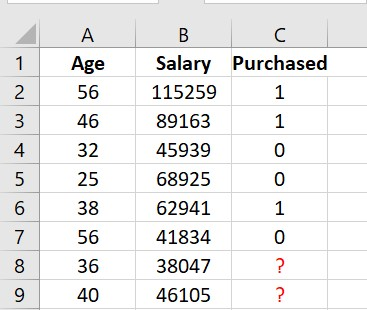

# Import Required Libraries and Modules

In [15]:
# pandas লাইব্রেরি ডেটা লোড ও প্রসেস করার জন্য
import pandas as pd

# train-test split করার জন্য sklearn থেকে module import করা হচ্ছে
from sklearn.model_selection import train_test_split

# Logistic Regression মডেল import করা হচ্ছে
from sklearn.linear_model import LogisticRegression

# মডেল evaluate করার জন্য প্রয়োজনীয় মেট্রিকগুলো import করা হচ্ছে
from sklearn.metrics import (
    accuracy_score,         # সঠিক প্রেডিকশনের অনুপাত
    precision_score,        # প্রেডিক্ট করা positives এর মধ্যে কতটা সঠিক
    recall_score,           # আসল positives এর মধ্যে কতটা ধরতে পেরেছে
    f1_score,               # precision ও recall এর গড়
    confusion_matrix,       # কোন ক্লাস কতবার ঠিক/ভুল হয়েছে
    classification_report   # বিস্তারিত রিপোর্ট
)


# Load and Prepare the Dataset for Logistic Regression

In [14]:
# CSV ফাইল থেকে ডেটাসেট লোড করা হচ্ছে
df = pd.read_csv('logRegData.csv')  # pandas দিয়ে ডেটা পড়া হলো

# ডেটাসেটের প্রথম ৫টি রো দেখা হচ্ছে
df.head()  # ডেটা দেখতে df.head() ব্যবহার করা হয়

# ইনপুট ফিচার হিসেবে Age এবং Salary নির্বাচন করা হচ্ছে
X = df[['Age','Salary']]  # independent ভেরিয়েবলগুলো X-তে রাখা হলো

# টার্গেট ভেরিয়েবল হিসেবে Purchased নির্বাচন করা হচ্ছে
y = df['Purchased']  # dependent ভেরিয়েবল y-তে রাখা হলো

# ডেটাসেটকে ট্রেনিং ও টেস্ট সেটে ভাগ করা হচ্ছে
# ৮০% ট্রেনিং, ২০% টেস্টিং; random_state দিলে split reproducible হয়
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Selection and Training (Fitting the Model)

In [16]:
# Logistic Regression মডেল নির্বাচন করা হচ্ছে
model = LogisticRegression()       # মডেল তৈরি করা হলো

# ট্রেনিং ডেটা দিয়ে মডেলকে শেখানো হচ্ছে
model.fit(X_train, y_train)        # মডেল ট্রেন করা হলো

# সফলভাবে ট্রেনিং শেষ হলে মেসেজ দেখানো হচ্ছে
print("Model Trained Successfully")  # সফলভাবে ট্রেনিং হয়েছে

Model Trained Successfully


# Making Predictions on Test Data

In [17]:
# ট্রেন করা মডেল দিয়ে টেস্ট ডেটার উপর প্রেডিকশন করা হচ্ছে
y_pred = model.predict(X_test)

# Classification Model Performance Evaluation

In [18]:
# মডেল কতটা ভালো কাজ করছে তা যাচাই করার জন্য বিভিন্ন মেট্রিক বের করা হচ্ছে

# সঠিকভাবে প্রেডিকশন হয়েছে এমন রেকর্ডের অনুপাত
accuracy = accuracy_score(y_test, y_pred)

# প্রেডিকশন করা positive গুলোর মধ্যে কতগুলো আসলেই positive ছিল
precision = precision_score(y_test, y_pred)

# আসল positive গুলোর মধ্যে কতগুলোকে ঠিকভাবে ধরতে পেরেছে
recall = recall_score(y_test, y_pred)

# precision আর recall এর ব্যালেন্স করা গড় মান
f1 = f1_score(y_test, y_pred)

# কোন ক্লাস কতবার ঠিক/ভুল প্রেডিক্ট হয়েছে তার ম্যাট্রিক্স
conf_matrix = confusion_matrix(y_test, y_pred)

# উপরের সব মেট্রিক প্রিন্ট করে দেখা হচ্ছে
print("Confusion Matrix: \n", conf_matrix)
print("Accuracy: ", accuracy) # accuracy কে চাইলে আমরা % এ দেখাতে পারি
                              #print(f"Accuracy: {accuracy * 100:.2f}%")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

# ক্লাস অনুযায়ী বিস্তারিত রিপোর্ট দেখানো হচ্ছে
print("Classification Report: \n", class_report)

Confusion Matrix: 
 [[10  2]
 [ 4 14]]
Accuracy:  0.8
Precision:  0.875
Recall:  0.7777777777777778
F1 Score:  0.8235294117647058
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.88      0.78      0.82        18

    accuracy                           0.80        30
   macro avg       0.79      0.81      0.80        30
weighted avg       0.81      0.80      0.80        30



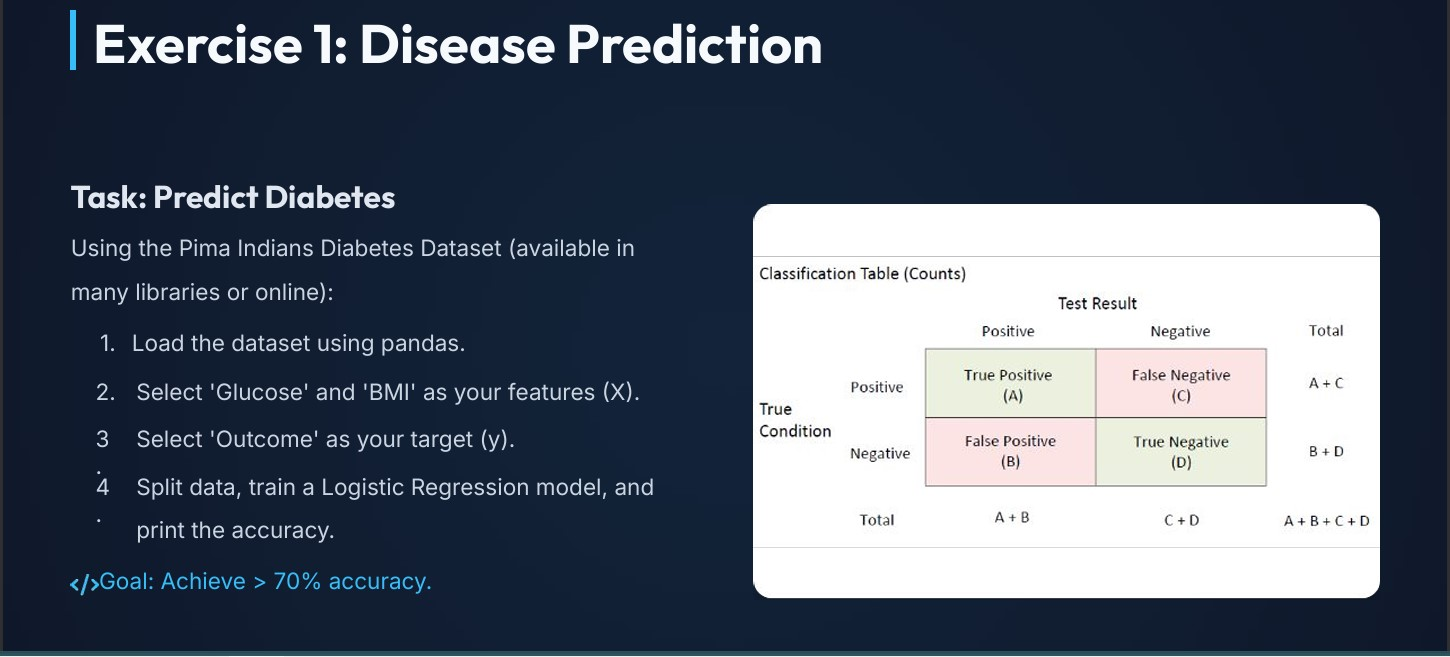

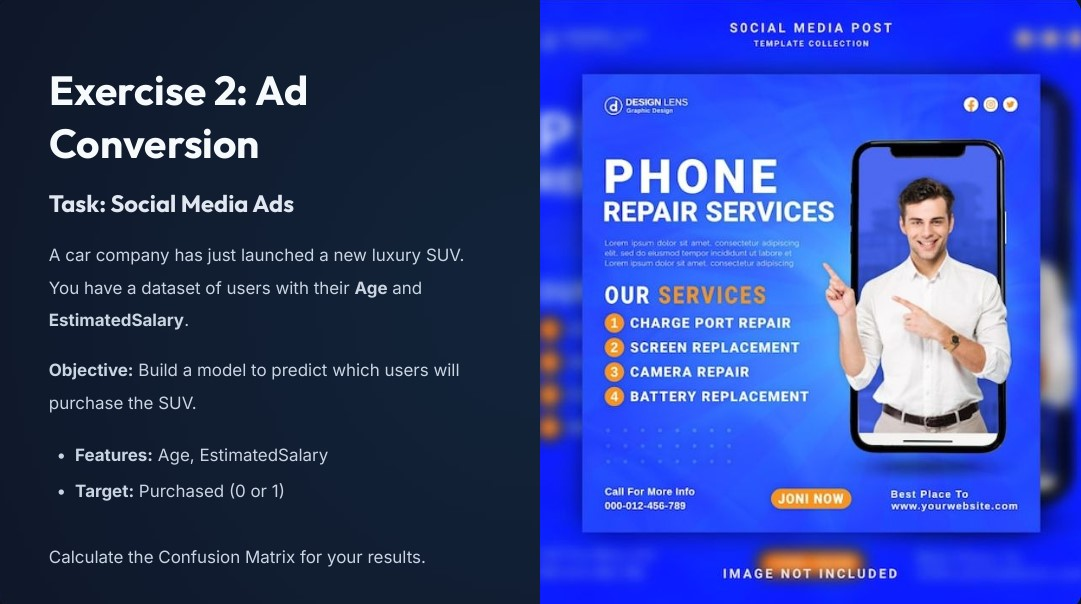